In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
#from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# browser = Browser('chrome')
#executable_path = {'executable_path': ChromeDriverManager().install()}
#browser = Browser('chrome', **executable_path, headless=False)
browser = Browser('chrome')

In [3]:
# Visit the website
url = "https://www.usgs.gov/programs/earthquake-hazards/lists-maps-and-statistics"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html

soup = soup(html, 'html.parser')

In [5]:
# Extract earthquake results 2000-2021
earth_2000= soup.find('table')
print (earth_2000)

<table>
<thead>
<tr>
<th>Magnitude</th>
<th>2000</th>
<th>2001</th>
<th>2002</th>
<th>2003</th>
<th>2004</th>
<th>2005</th>
<th>2006</th>
<th>2007</th>
<th>2008</th>
<th>2009</th>
<th>2010</th>
<th>2011</th>
<th>2012</th>
<th>2013</th>
<th>2014</th>
<th>2015</th>
<th>2016</th>
<th>2017</th>
<th>2018</th>
<th>2019</th>
<th>2020</th>
<th>2021</th>
</tr>
</thead>
<tbody>
<tr>
<th>8.0+</th>
<td>1</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>1</td>
<td>2</td>
<td>4</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>2</td>
<td>2</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>3</td>
</tr>
<tr>
<th>7–7.9</th>
<td>14</td>
<td>15</td>
<td>13</td>
<td>14</td>
<td>14</td>
<td>10</td>
<td>9</td>
<td>14</td>
<td>12</td>
<td>16</td>
<td>23</td>
<td>19</td>
<td>12</td>
<td>17</td>
<td>11</td>
<td>18</td>
<td>16</td>
<td>6</td>
<td>16</td>
<td>9</td>
<td>9</td>
<td>16</td>
</tr>
<tr>
<th>6–6.9</th>
<td>146</td>
<td>121</td>
<td>127</td>
<td>140</td>
<td>

In [6]:
# empty list
#data = []

# for getting the header from
# the HTML file
#list_header = []
for i in range(4):
    if i ==1:
        table1 = soup.find_all("table")[i]
    elif i==2:
        table2 = soup.find_all("table")[i]

In [7]:
# second table 1990-1999 data
table2

<table>
<thead>
<tr>
<th>Magnitude</th>
<th>1990</th>
<th>1991</th>
<th>1992</th>
<th>1993</th>
<th>1994</th>
<th>1995</th>
<th>1996</th>
<th>1997</th>
<th>1998</th>
<th>1999</th>
</tr>
</thead>
<tbody>
<tr>
<th>8+</th>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>2</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<th>7–7.9</th>
<td>18</td>
<td>16</td>
<td>13</td>
<td>12</td>
<td>11</td>
<td>18</td>
<td>14</td>
<td>16</td>
<td>11</td>
<td>18</td>
</tr>
<tr>
<th>6–6.9</th>
<td>109</td>
<td>96</td>
<td>166</td>
<td>137</td>
<td>146</td>
<td>183</td>
<td>149</td>
<td>120</td>
<td>117</td>
<td>116</td>
</tr>
<tr>
<th>5–5.9</th>
<td>1617</td>
<td>1457</td>
<td>1498</td>
<td>1426</td>
<td>1542</td>
<td>1318</td>
<td>1222</td>
<td>1113</td>
<td>979</td>
<td>1104</td>
</tr>
<tr>
<th>Estimated<br/>
			Deaths</th>
<td>52056</td>
<td>3210</td>
<td>3920</td>
<td>10096</td>
<td>1634</td>
<td>7980</td>
<td>589</td>
<td>3069</td>
<td>9430</td>
<td>22662</td>
</tr>
</tbody>
</

In [8]:
# Create a Pandas DataFrame for 1990-1999
table2_headers = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']
table2_data = pd.DataFrame(columns = table2_headers)

for data in table2.find_all('tbody'):
    rows = data.find_all('tr')

for row in rows:
    table_data = row.find_all('td')
    row_data=[td.text.strip() for td in table_data]
    lenghth=len(table2_data)
    table2_data.loc[lenghth]=row_data
    
table2_data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,2,2,1,0,1,0
1,18,16,13,12,11,18,14,16,11,18
2,109,96,166,137,146,183,149,120,117,116
3,1617,1457,1498,1426,1542,1318,1222,1113,979,1104
4,52056,3210,3920,10096,1634,7980,589,3069,9430,22662


In [9]:
# Creat a Pandas Dataframe for 2000-2021 data
table1_headers = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
table1_data = pd.DataFrame(columns = table1_headers)

for data in earth_2000.find_all('tbody'):
    rows = data.find_all('tr')

for row in rows:
    table_data = row.find_all('td')
    row_data=[td.text.strip() for td in table_data]
    lenghth=len(table1_data)
    table1_data.loc[lenghth]=row_data
    
table1_data

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,1,0,1,2,1,2,4,0,1,...,2,2,1,1,0,1,1,1,0,3
1,14,15,13,14,14,10,9,14,12,16,...,12,17,11,18,16,6,16,9,9,16
2,146,121,127,140,141,140,142,178,168,144,...,108,123,143,127,130,104,117,135,112,140
3,1344,1224,1201,1203,1515,1693,1712,2074,1768,1896,...,1401,1453,1574,1419,1550,1455,1674,1492,1312,2047
4,231,21357,1685,33819,298101,87992,6605,708,88708,1790,...,689,1572,756,9624,1297,1012,4535,244,not avail,not avail


In [10]:
# Merge two tables
combined_data = pd.concat([table2_data, table1_data], axis=1, join='inner')
combined_data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,2,2,1,0,1,0,...,2,2,1,1,0,1,1,1,0,3
1,18,16,13,12,11,18,14,16,11,18,...,12,17,11,18,16,6,16,9,9,16
2,109,96,166,137,146,183,149,120,117,116,...,108,123,143,127,130,104,117,135,112,140
3,1617,1457,1498,1426,1542,1318,1222,1113,979,1104,...,1401,1453,1574,1419,1550,1455,1674,1492,1312,2047
4,52056,3210,3920,10096,1634,7980,589,3069,9430,22662,...,689,1572,756,9624,1297,1012,4535,244,not avail,not avail


In [ ]:
# Add label
label_data = ['8.0+','7-7.9','6-6.9','5-5.9','Est Deaths'] 
label_df = pd.DataFrame(label_data, columns=['Magnitude'])
combined_data = pd.concat([label_df, combined_data], axis=1, join='inner')
combined_data

In [11]:
browser.quit()

In [ ]:
# save to No-sql database
# Import dependencies
from pymongo import MongoClient

In [ ]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [ ]:
# confirm that our new database was created
print(mongo.list_database_names())

In [ ]:
#create a db for earthquake
db = mongo['earth_quake']

In [ ]:
# review the collections in our new database
print(db.list_collection_names())

In [ ]:
# assign the collection to a variable
earthquake_data = db['earthquake_1990_2021']

In [ ]:
#convert data frame to json
import json
records = json.loads(combined_data.to_json(orient='records'))
records

In [ ]:
#save json to collection
#earthquake_data.insert_many(records)
#with open("earthquake.json", "w") as outfile:
#    json.dump(records, outfile)

In [ ]:
earthquake_data.find_one({'Magnitude': '5-5.9'})

In [12]:
#clean data by removing unnecessary column
updated_combined_data = combined_data.drop([combined_data.index[4]])
updated_combined_data

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,2,2,1,0,1,0,...,2,2,1,1,0,1,1,1,0,3
1,18,16,13,12,11,18,14,16,11,18,...,12,17,11,18,16,6,16,9,9,16
2,109,96,166,137,146,183,149,120,117,116,...,108,123,143,127,130,104,117,135,112,140
3,1617,1457,1498,1426,1542,1318,1222,1113,979,1104,...,1401,1453,1574,1419,1550,1455,1674,1492,1312,2047


In [13]:
#get the average of each year after converting data into int.
updated_combined_data.info()
updated_combined_data = updated_combined_data.astype(str).astype(int)
av_column = updated_combined_data.mean(axis=0).astype(int)
av_column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    4 non-null      object
 1   1991    4 non-null      object
 2   1992    4 non-null      object
 3   1993    4 non-null      object
 4   1994    4 non-null      object
 5   1995    4 non-null      object
 6   1996    4 non-null      object
 7   1997    4 non-null      object
 8   1998    4 non-null      object
 9   1999    4 non-null      object
 10  2000    4 non-null      object
 11  2001    4 non-null      object
 12  2002    4 non-null      object
 13  2003    4 non-null      object
 14  2004    4 non-null      object
 15  2005    4 non-null      object
 16  2006    4 non-null      object
 17  2007    4 non-null      object
 18  2008    4 non-null      object
 19  2009    4 non-null      object
 20  2010    4 non-null      object
 21  2011    4 non-null      object
 22  2012    4 non-null      object

1990    436
1991    392
1992    419
1993    393
1994    425
1995    380
1996    346
1997    312
1998    277
1999    309
2000    376
2001    340
2002    335
2003    339
2004    418
2005    461
2006    466
2007    567
2008    487
2009    514
2010    595
2011    620
2012    380
2013    398
2014    432
2015    391
2016    424
2017    391
2018    452
2019    409
2020    358
2021    551
dtype: int32

In [14]:
#get each magnitude of each year.
mag_8 = updated_combined_data.iloc[0]
mag_7 = updated_combined_data.iloc[1]
mag_6 = updated_combined_data.iloc[2]
mag_5 = updated_combined_data.iloc[3]

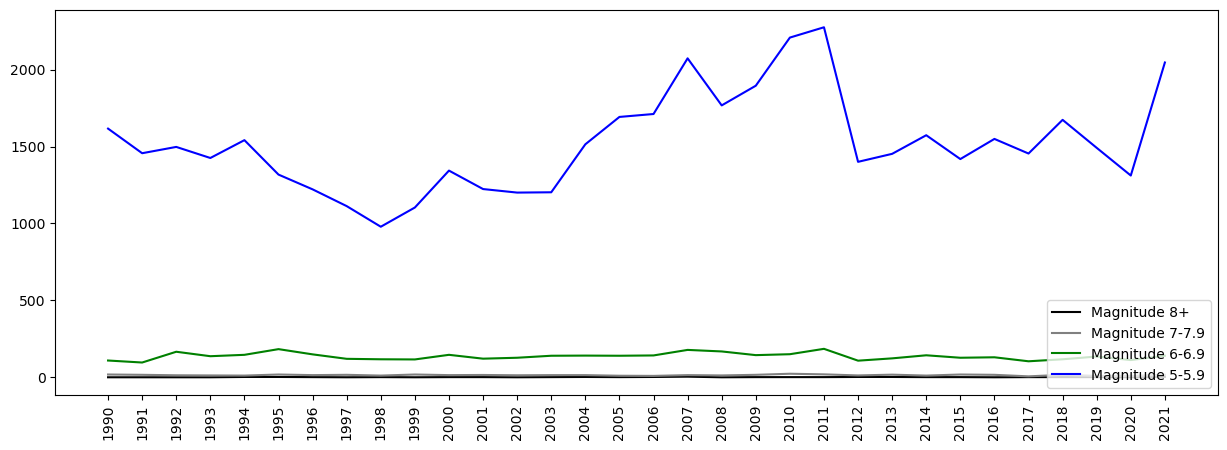

In [15]:
#plt.plot all magnitude
import numpy as np
x_axis = list(range(1990,2022))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,5))
plt.plot(x_axis, mag_8, color='black', alpha=1, label="Magnitude 8+")
plt.plot(x_axis, mag_7, color='grey', alpha=1, label="Magnitude 7-7.9")
plt.plot(x_axis, mag_6, color='green', alpha=1, label="Magnitude 6-6.9")
plt.plot(x_axis, mag_5, color='blue', alpha=1, label="Magnitude 5-5.9")
plt.xticks(tick_locations, rotation="vertical")
plt.legend(loc="lower right")
plt.show()

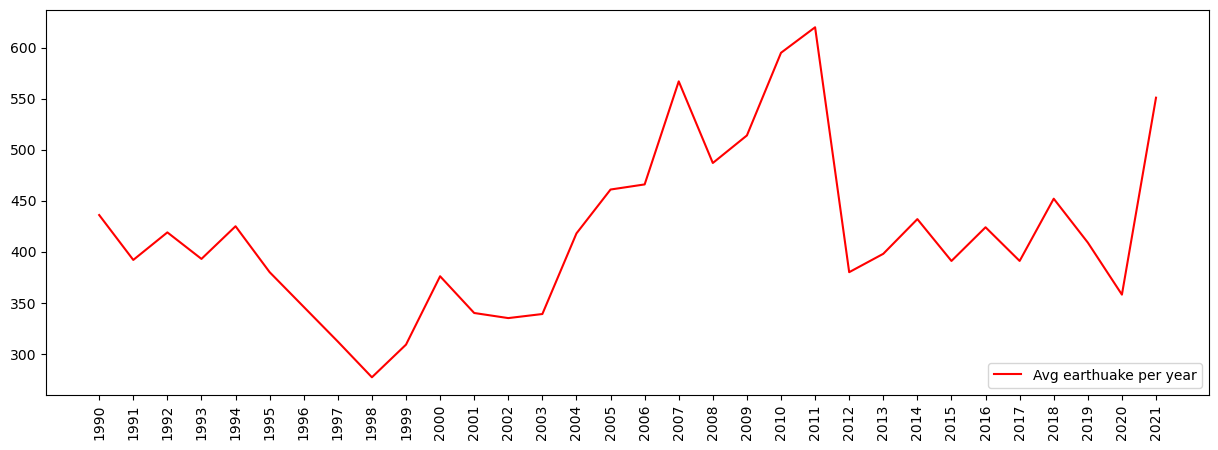

In [17]:
#plt.plot avg per year
x_axis = list(range(1990,2022))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,5))
plt.plot(x_axis, av_column, color='r', alpha=1, label="Avg earthuake per year")
plt.xticks(tick_locations, rotation="vertical")
plt.legend(loc="lower right")
plt.show()